In [1]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,MotionClouds 

Python implementation: CPython
Python version       : 3.12.6
IPython version      : 8.27.0

numpy       : 1.26.4
MotionClouds: 20220927

Compiler    : Clang 16.0.0 (clang-1600.0.26.3)
OS          : Darwin
Release     : 24.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

Hostname: obiwan.local



# pilot: one B_sf some B_theta many thetas

In [2]:
# %rm -fr img_pilot

In [79]:
import os
import pandas as pd


if not(os.path.isfile(f'{data_folder}/parameters.json')):
    data_folder = 'img_pilot'
    os.makedirs(data_folder, exist_ok=True)

    print('\n Initializing')

    # parameters 
    import MotionClouds as mc
    import numpy as np

    N_B_theta = 9
    N_B_sf = 1
    N_repet = 2
    N_thetas = 12

    B_thetas = np.pi/3 * np.linspace(0, 1, N_B_theta+1)[1:]
    print('B_thetas = ', B_thetas)
    B_sfs = [mc.B_sf] #* np.logspace(-1, -1, N_B_sf, base=2)
    print('B_sfs = ', B_sfs)
    theta_max = np.pi/8
    thetas = np.linspace(-theta_max, theta_max, N_thetas)

    parameters = pd.DataFrame(columns=['i_trial', 'theta', 'B_theta', 'B_sf', 'seed', 'fname'])
    # generate all clouds
    import imageio
    def generate_random_cloud(i_trial, theta, B_theta, B_sf, seed, downscale = 1):
        # fname = f'{data_folder}/theta_{theta}_B_theta_{B_theta}_B_sf_{B_sf}_seed_{seed}.png'
        fname = f'{data_folder}/{i_trial}.png'
        if not os.path.isfile(fname):
            fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)
            mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_sf=B_sf,
                                    B_V=0, theta=np.pi/2-theta, B_theta=B_theta)
            im = mc.random_cloud(mc_i, seed=seed)
            im = (mc.rectif(im) * 255).astype('uint8')
            imageio.imwrite(fname, im[:, :, 0])
        return fname


    all_conditions = [(i_repet, i_theta, i_B_theta, i_B_sf) 
                    for i_repet in range(N_repet) 
                    for i_theta in range(N_thetas) 
                    for i_B_theta in range(N_B_theta) 
                    for i_B_sf in range(N_B_sf)]
    N_total_trials = len(all_conditions)
    ind = np.random.permutation(N_total_trials)

    seed = 2024
    np.random.seed(seed)
    # parameters = []
    for i_trial in range(N_total_trials):
        i_repet, i_theta, i_B_theta, i_B_sf = all_conditions[ind[i_trial]]

        fname = generate_random_cloud(i_trial, thetas[i_theta], 
                                B_theta=B_thetas[i_B_theta], 
                                B_sf=B_sfs[i_B_sf], 
                                seed=seed+i_trial)
        # parameters.append({'fname':fname, 'theta': thetas[i_theta], 'B_theta': B_thetas[i_B_theta], 'B_sf': B_sfs[i_B_sf], 'seed': seed+i_trial, 'i_trial': i_trial})
        parameters.loc[i_trial] = [i_trial, thetas[i_theta], B_thetas[i_B_theta], B_sfs[i_B_sf], seed+i_trial, fname]
        print(f"          {{stimulus: '{fname}'}},",

    )

    parameters.to_json(f'{data_folder}/parameters.json')
    # import json
    # with open(f'{data_folder}/parameters.json', 'w') as f:
    #     json.dump(parameters, f)
else:
    parameters = pd.read_json(f'{data_folder}/parameters.json')
parameters


,fname,theta,B_theta,B_sf,seed,i_trial
0,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...
211,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [77]:

# parameters = pd.read_json(f'{data_folder}/parameters.json')
parameters

,fname,theta,B_theta,B_sf,seed,i_trial
0,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...
211,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [78]:
parameters.to_json(f'{data_folder}/parameters.json')
parameters = pd.read_json(f'{data_folder}/parameters.json')
parameters


,fname,theta,B_theta,B_sf,seed,i_trial
0,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...
211,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [80]:
parameters

,fname,theta,B_theta,B_sf,seed,i_trial
0,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...
211,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [22]:
# %rm -fr img_pilot

In [23]:
parameters

,i_trial,theta,B_theta,B_sf,seed,fname
0,0,0.392699,0.814487,0.1,2024,img_pilot/0.png
1,1,0.392699,0.232711,0.1,2025,img_pilot/1.png
2,2,-0.178500,0.349066,0.1,2026,img_pilot/2.png
3,3,-0.035700,0.581776,0.1,2027,img_pilot/3.png
4,4,0.107100,0.116355,0.1,2028,img_pilot/4.png
...,...,...,...,...,...,...
211,211,0.107100,0.349066,0.1,2235,img_pilot/211.png
212,212,-0.035700,0.930842,0.1,2236,img_pilot/212.png
213,213,0.392699,0.698132,0.1,2237,img_pilot/213.png
214,214,0.321299,0.698132,0.1,2238,img_pilot/214.png


#   analysing data

In [24]:
%pip install osfclient

Note: you may need to restart the kernel to use updated packages.


In [25]:
import glob


In [85]:
# import osfclient
# osfclient.cli.init?

## time elapsed per session

In [100]:
for fname in glob.glob('osfstorage-archive/*json'):
    df = pd.read_json(fname)
    print(f'{fname}: total seconds elapsed {np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]/1000:.0f}')
    # print(df)

osfstorage-archive/pilot-fbskhswn2h-data.json: total seconds elapsed 8
osfstorage-archive/pilot-6l605rv4nn-data.json: total seconds elapsed 240
osfstorage-archive/pilot-fleb1b7w6x-data.json: total seconds elapsed 10
osfstorage-archive/pilot-39dqyx1uj0-data.json: total seconds elapsed 214
osfstorage-archive/pilot-6u3sonqvcr-data.json: total seconds elapsed 11
osfstorage-archive/pilot-btnuh2haf5-data.json: total seconds elapsed 201
osfstorage-archive/pilot-84mtaqs5h7-data.json: total seconds elapsed 270


## accuracy per session

In [110]:
# df = df.iloc[1:]
# df = df.reset_index(drop=True)
df

,success,timeout,failed_images,failed_audio,failed_video,trial_type,trial_index,time_elapsed,internal_node_id,rt,stimulus,keyboard_response,swipe_response,response_source
0,1.0,0.0,[],[],[],preload,0,1987,0.0-0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,image-swipe-response,1,3727,0.0-1.0-0.0,1460.0,img_pilot/0.png,NaN,right,swipe
2,NaN,NaN,NaN,NaN,NaN,image-swipe-response,2,4930,0.0-1.0-1.0,949.0,img_pilot/1.png,NaN,left,swipe
3,NaN,NaN,NaN,NaN,NaN,image-swipe-response,3,10256,0.0-1.0-2.0,5066.0,img_pilot/2.png,NaN,left,swipe
4,NaN,NaN,NaN,NaN,NaN,image-swipe-response,4,11375,0.0-1.0-3.0,845.0,img_pilot/3.png,NaN,right,swipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,image-swipe-response,212,264077,0.0-1.0-211.0,588.0,img_pilot/211.png,NaN,right,swipe
213,NaN,NaN,NaN,NaN,NaN,image-swipe-response,213,266228,0.0-1.0-212.0,1894.0,img_pilot/212.png,NaN,right,swipe
214,NaN,NaN,NaN,NaN,NaN,image-swipe-response,214,267379,0.0-1.0-213.0,895.0,img_pilot/213.png,NaN,left,swipe
215,NaN,NaN,NaN,NaN,NaN,image-swipe-response,215,268373,0.0-1.0-214.0,736.0,img_pilot/214.png,NaN,left,swipe


In [111]:
df['trial_type']=='image-swipe-response'

0      False
1       True
2       True
3       True
4       True
       ...  
212     True
213     True
214     True
215     True
216     True
Name: trial_type, Length: 217, dtype: bool

In [112]:
df[df['trial_type']=='image-swipe-response']

,success,timeout,failed_images,failed_audio,failed_video,trial_type,trial_index,time_elapsed,internal_node_id,rt,stimulus,keyboard_response,swipe_response,response_source
1,NaN,NaN,NaN,NaN,NaN,image-swipe-response,1,3727,0.0-1.0-0.0,1460.0,img_pilot/0.png,NaN,right,swipe
2,NaN,NaN,NaN,NaN,NaN,image-swipe-response,2,4930,0.0-1.0-1.0,949.0,img_pilot/1.png,NaN,left,swipe
3,NaN,NaN,NaN,NaN,NaN,image-swipe-response,3,10256,0.0-1.0-2.0,5066.0,img_pilot/2.png,NaN,left,swipe
4,NaN,NaN,NaN,NaN,NaN,image-swipe-response,4,11375,0.0-1.0-3.0,845.0,img_pilot/3.png,NaN,right,swipe
5,NaN,NaN,NaN,NaN,NaN,image-swipe-response,5,12442,0.0-1.0-4.0,811.0,img_pilot/4.png,NaN,right,swipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,image-swipe-response,212,264077,0.0-1.0-211.0,588.0,img_pilot/211.png,NaN,right,swipe
213,NaN,NaN,NaN,NaN,NaN,image-swipe-response,213,266228,0.0-1.0-212.0,1894.0,img_pilot/212.png,NaN,right,swipe
214,NaN,NaN,NaN,NaN,NaN,image-swipe-response,214,267379,0.0-1.0-213.0,895.0,img_pilot/213.png,NaN,left,swipe
215,NaN,NaN,NaN,NaN,NaN,image-swipe-response,215,268373,0.0-1.0-214.0,736.0,img_pilot/214.png,NaN,left,swipe


In [113]:
np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]

269629

In [114]:
df_results = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
df_results = df_results.reset_index(drop=True)
df_results

,trial_index,stimulus,swipe_response,keyboard_response,rt,response_source
0,1,img_pilot/0.png,right,NaN,1460.0,swipe
1,2,img_pilot/1.png,left,NaN,949.0,swipe
2,3,img_pilot/2.png,left,NaN,5066.0,swipe
3,4,img_pilot/3.png,right,NaN,845.0,swipe
4,5,img_pilot/4.png,right,NaN,811.0,swipe
...,...,...,...,...,...,...
211,212,img_pilot/211.png,right,NaN,588.0,swipe
212,213,img_pilot/212.png,right,NaN,1894.0,swipe
213,214,img_pilot/213.png,left,NaN,895.0,swipe
214,215,img_pilot/214.png,left,NaN,736.0,swipe


In [115]:
parameters

,fname,theta,B_theta,B_sf,seed,i_trial
0,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...
211,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [116]:
df_results = pd.concat([df_results, parameters], axis=1)
df_results

,trial_index,stimulus,swipe_response,keyboard_response,rt,response_source,fname,theta,B_theta,B_sf,seed,i_trial
0,1,img_pilot/0.png,right,NaN,1460.0,swipe,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,2,img_pilot/1.png,left,NaN,949.0,swipe,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,3,img_pilot/2.png,left,NaN,5066.0,swipe,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,4,img_pilot/3.png,right,NaN,845.0,swipe,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,5,img_pilot/4.png,right,NaN,811.0,swipe,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...,...,...,...,...,...,...
211,212,img_pilot/211.png,right,NaN,588.0,swipe,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,213,img_pilot/212.png,right,NaN,1894.0,swipe,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,214,img_pilot/213.png,left,NaN,895.0,swipe,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,215,img_pilot/214.png,left,NaN,736.0,swipe,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [117]:
(df_results['swipe_response'] == 'right') + (df_results['keyboard_response'] == 'arrowright')

0       True
1      False
2      False
3       True
4       True
       ...  
211     True
212     True
213    False
214    False
215     True
Length: 216, dtype: bool

In [118]:
correct = np.array((parameters['theta'] > 0) == ((df_results['swipe_response'] == 'right') + (df_results['keyboard_response'] == 'arrowright')))
correct.mean()

0.8518518518518519

In [143]:
for fname in glob.glob('osfstorage-archive/*json'):
    df = pd.read_json(fname)
    df_results = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
    df_results = df_results.reset_index(drop=True)
    df_results = pd.concat([df_results, parameters], axis=1)
    correct = np.array((df_results['theta'] > 0) == ((df_results['swipe_response'] == 'right') + (df_results['keyboard_response'] == 'right')))
    # print(f'{fname}: total seconds elapsed {np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]/1000:.0f}')
    # print(f'{fname}: total seconds elapsed {np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]/1000:.0f}/ accuracy = {correct.mean()*100:.1f}%')
    print(f'{fname}: accuracy = {correct.mean()*100:.1f}%')
    # print(df)

osfstorage-archive/pilot-6l605rv4nn-data.json: accuracy = 74.5%
osfstorage-archive/pilot-84mtaqs5h7-data.json: accuracy = 85.2%


## accuracy per B_theta

In [141]:

B_thetas = np.sort(np.array(parameters['B_theta'].unique()))

for B_theta in B_thetas:
    print(B_theta)

0.1163552835
0.2327105669
0.3490658504
0.4654211339
0.5817764173000001
0.6981317008
0.8144869843
0.9308422677
1.0471975512


In [140]:
B_thetas = np.sort(np.array(parameters['B_theta'].unique()))
B_thetas

array([0.11635528, 0.23271057, 0.34906585, 0.46542113, 0.58177642,
       0.6981317 , 0.81448698, 0.93084227, 1.04719755])

In [150]:
results = []
for fname in glob.glob('osfstorage-archive/*json'):
    results_ = []
    df = pd.read_json(fname)
    df_results = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
    df_results = df_results.reset_index(drop=True)
    df_results = pd.concat([df_results, parameters], axis=1)
    for B_theta in B_thetas:
        df_results_ =  df_results[df_results['B_theta'] == B_theta]
        correct = np.array((df_results_['theta'] > 0) == ((df_results_['swipe_response'] == 'right') + (df_results_['keyboard_response'] == 'right')))
        results_.append(correct.mean())
        print(f'{fname}: {B_theta=:.1f} - accuracy = {correct.mean()*100:.1f}%')
    # print(df)
    results.append(results_)

osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.1 - accuracy = 91.7%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.2 - accuracy = 95.8%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.3 - accuracy = 95.8%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.5 - accuracy = 79.2%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.6 - accuracy = 79.2%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.7 - accuracy = 75.0%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.8 - accuracy = 50.0%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=0.9 - accuracy = 58.3%
osfstorage-archive/pilot-6l605rv4nn-data.json: B_theta=1.0 - accuracy = 45.8%
osfstorage-archive/pilot-84mtaqs5h7-data.json: B_theta=0.1 - accuracy = 95.8%
osfstorage-archive/pilot-84mtaqs5h7-data.json: B_theta=0.2 - accuracy = 100.0%
osfstorage-archive/pilot-84mtaqs5h7-data.json: B_theta=0.3 - accuracy = 100.0%
osfstorage-archive/pilot-84mtaqs5h7-data.json: B_theta=0.5 - a

In [151]:
results

[[0.9166666666666666,
  0.9583333333333334,
  0.9583333333333334,
  0.7916666666666666,
  0.7916666666666666,
  0.75,
  0.5,
  0.5833333333333334,
  0.4583333333333333],
 [0.9583333333333334,
  1.0,
  1.0,
  0.9166666666666666,
  0.875,
  0.875,
  0.75,
  0.7083333333333334,
  0.5833333333333334]]

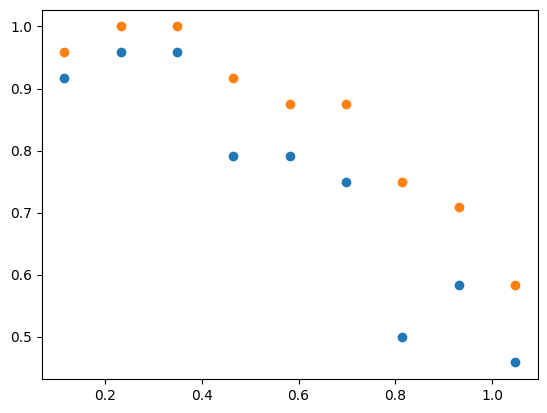

In [152]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
for results_ in results:
    ax.plot(B_thetas, results_, 'o')